# Student Performance Analysis
In this notebook, we’ll analyze a dataset of student performance to:
- Explore exam scores, study hours, and attendance.
- Visualize trends with charts.
- Build a simple Machine Learning model to predict pass/fail status.

This is a beginner-friendly project to practice Data Science and ML skills!

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## Creating the Dataset
Since we don’t have a real dataset, we’ll create a sample one with student data:
- Name: Student’s name
- Study_Hours: Hours studied per week
- Attendance: Percentage of classes attended
- Exam_Score: Final exam score (0–100)
- Passed: 1 (passed, score ≥ 60) or 0 (failed)

In [7]:

data = {
    "Name": ["Alice", "Bob", "Charlie", "Dia", "Eve", "Frank", "Grace", "Hannah", "Ivy", "Jack"],
    "Study_Hours": [10, 5, 8, 12, 3, 7, 9, 11, 4, 6],
    "Attendance": [90, 70, 85, 95, 60, 80, 88, 92, 65, 75],
    "Exam_Score": [85, 55, 78, 92, 50, 72, 80, 88, 58, 65],
    "Passed": [1, 0, 1, 1, 0, 1, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

## Data Exploration
Let’s summarize the data:
- Check basic statistics (mean, min, max).
- Look for patterns, like average study hours for passers vs. failers.

In [8]:
print("Dataset Summary:")
print(df.describe())

print("\nAverage Study Hours by Pass/Fail:")
print(df.groupby("Passed")["Study_Hours"].mean())
print("\nAverage Attendance by Pass/Fail:")
print(df.groupby("Passed")["Attendance"].mean())

Dataset Summary:
       Study_Hours  Attendance  Exam_Score     Passed
count     10.00000   10.000000   10.000000  10.000000
mean       7.50000   80.000000   72.300000   0.700000
std        3.02765   12.055428   14.689755   0.483046
min        3.00000   60.000000   50.000000   0.000000
25%        5.25000   71.250000   59.750000   0.250000
50%        7.50000   82.500000   75.000000   1.000000
75%        9.75000   89.500000   83.750000   1.000000
max       12.00000   95.000000   92.000000   1.000000

Average Study Hours by Pass/Fail:
Passed
0    4.0
1    9.0
Name: Study_Hours, dtype: float64

Average Attendance by Pass/Fail:
Passed
0    65.000000
1    86.428571
Name: Attendance, dtype: float64


## Visualizations
Let’s create:
1. A scatter plot to see how study hours and attendance relate to exam scores.
2. A box plot to compare exam scores for passers vs. failers.

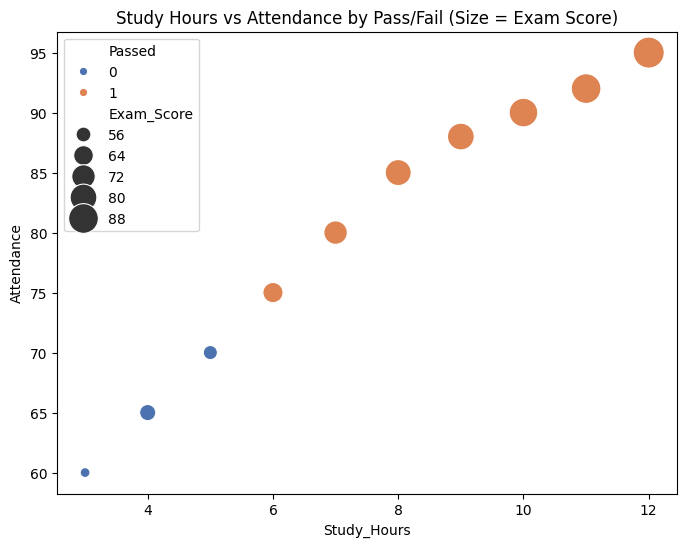

In [9]:
# Visualizations
# Scatter plot: Study Hours vs. Attendance colored by Pass/Fail, sized by Exam Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Study_Hours", y="Attendance", hue="Passed", size="Exam_Score", data=df, palette="deep", sizes=(50, 500))
plt.title("Study Hours vs Attendance by Pass/Fail (Size = Exam Score)")
plt.show()

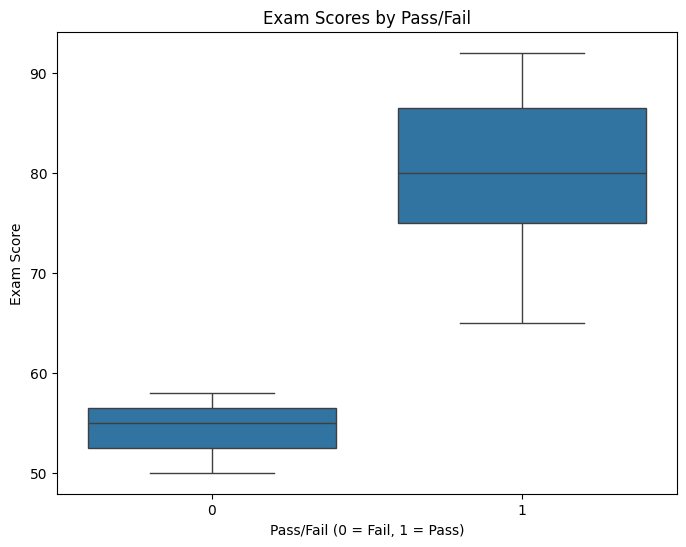

In [10]:
# Box plot: Exam Scores by Pass/Fail
plt.figure(figsize=(8, 6))
sns.boxplot(x="Passed", y="Exam_Score", data=df)
plt.title("Exam Scores by Pass/Fail")
plt.xlabel("Pass/Fail (0 = Fail, 1 = Pass)")
plt.ylabel("Exam Score")
plt.show()

## Simple Machine Learning Model
Let’s build a Logistic Regression model to predict if a student passes based on Study Hours and Attendance.
- Features: Study_Hours, Attendance
- Target: Passed (0 or 1)

In [11]:
# Prepare data for ML
X = df[["Study_Hours", "Attendance", "Exam_Score"]]  # Include Exam_Score
y = df["Passed"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Scale features (inspired by Hands-On Machine Learning, Chapter 2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Cross-validation for small dataset
scores = cross_val_score(model, scaler.transform(X), y, cv=5)
print("Cross-Validation Accuracy:", scores.mean(), "±", scores.std())

# Test new student
new_student = pd.DataFrame([[8, 85, 78]], columns=["Study_Hours", "Attendance", "Exam_Score"])
new_student_scaled = scaler.transform(new_student)
print("Prediction for new student (8 hours, 85% attendance, 78 score):", "Pass" if model.predict(new_student_scaled)[0] == 1 else "Fail")

Model Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

Cross-Validation Accuracy: 1.0 ± 0.0
Prediction for new student (8 hours, 85% attendance, 78 score): Pass


/Users/granthjoshi/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


## Conclusion
- Students who study more and attend more classes tend to pass.
- Our Logistic Regression model predicts pass/fail with good accuracy.
- Next steps: Try a real dataset (e.g., from Kaggle) and experiment with more features or models!